In [77]:
!pip install matplotlib -q
!pip install seaborn -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm

font_path = r'C:\\Windows\\Fonts\\HANBaekM.TTF' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)

# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용
plt.rc('axes', unicode_minus=False)

In [78]:
# 데이터 읽어오기
shopping_df = pd.read_csv('data/shopping_behavior_updated.csv')
shopping_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
print(shopping_df.shape) # 3900행, 18열
print(shopping_df.dtypes)

(3900, 18)
Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object


In [80]:
shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

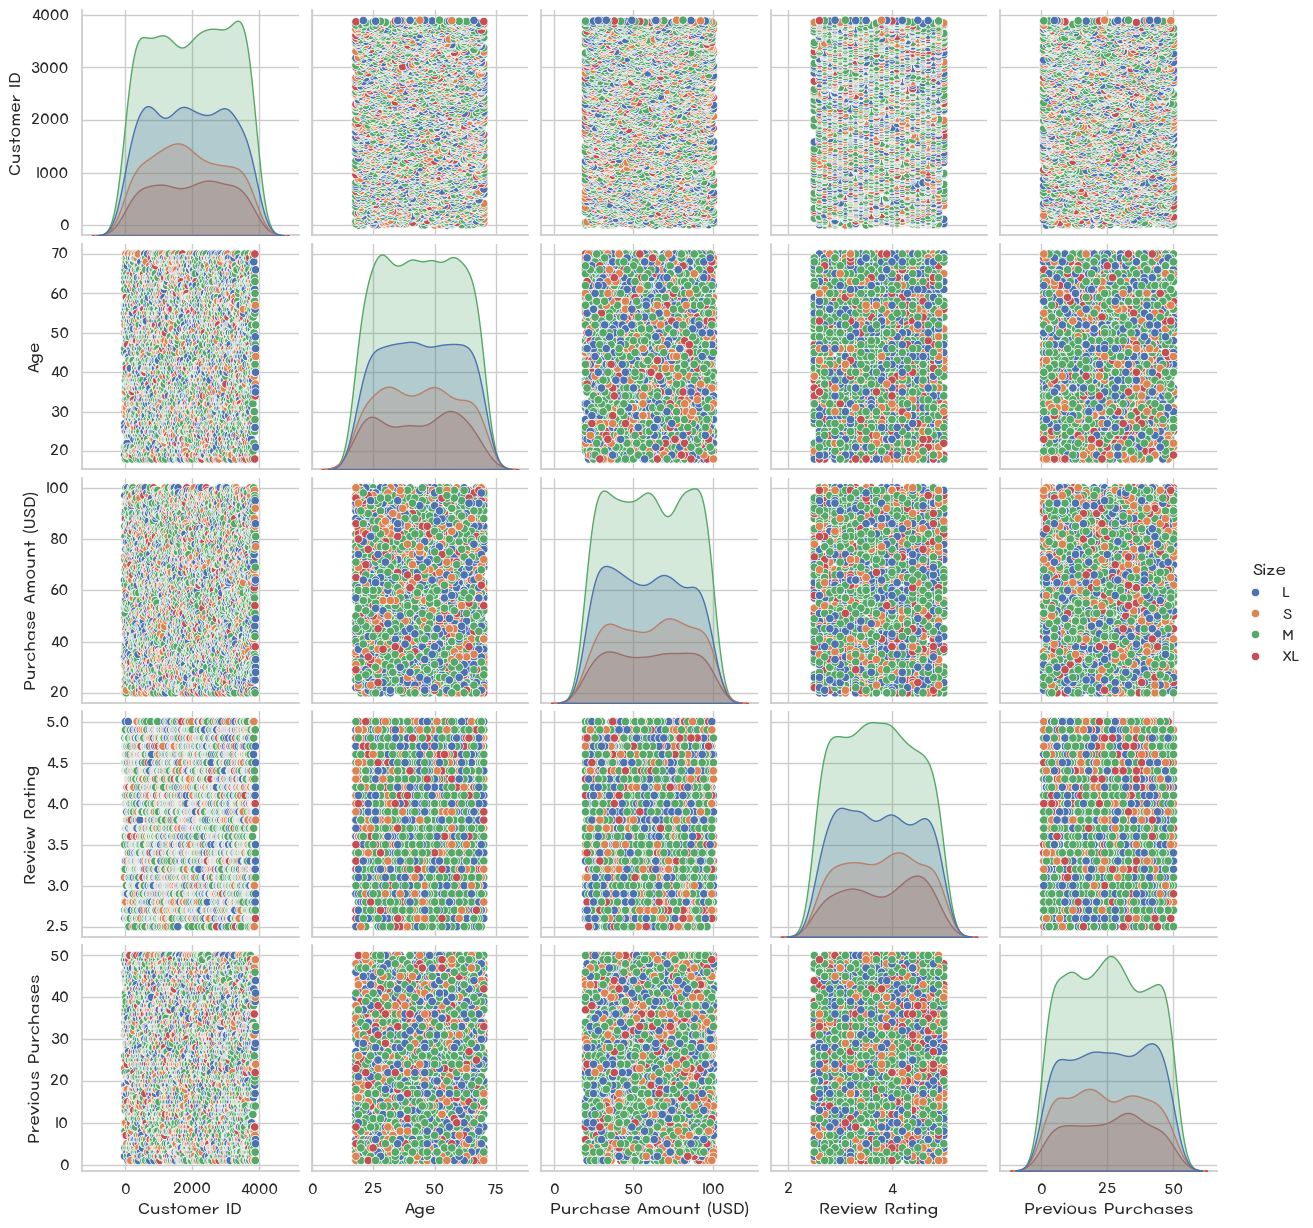

In [55]:
sns.pairplot(shopping_df, hue='Size')

plt.show()

In [56]:
shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [57]:
shopping_df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


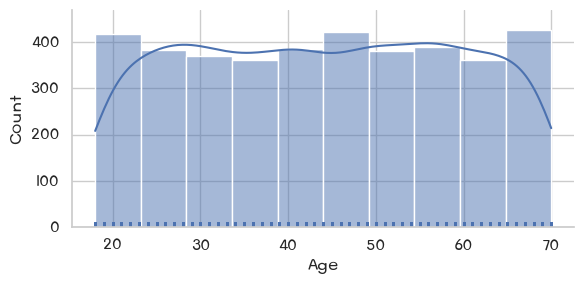

In [58]:
sns.displot(shopping_df['Age'], bins=10, height=3, aspect=2, rug=True, kde=True)

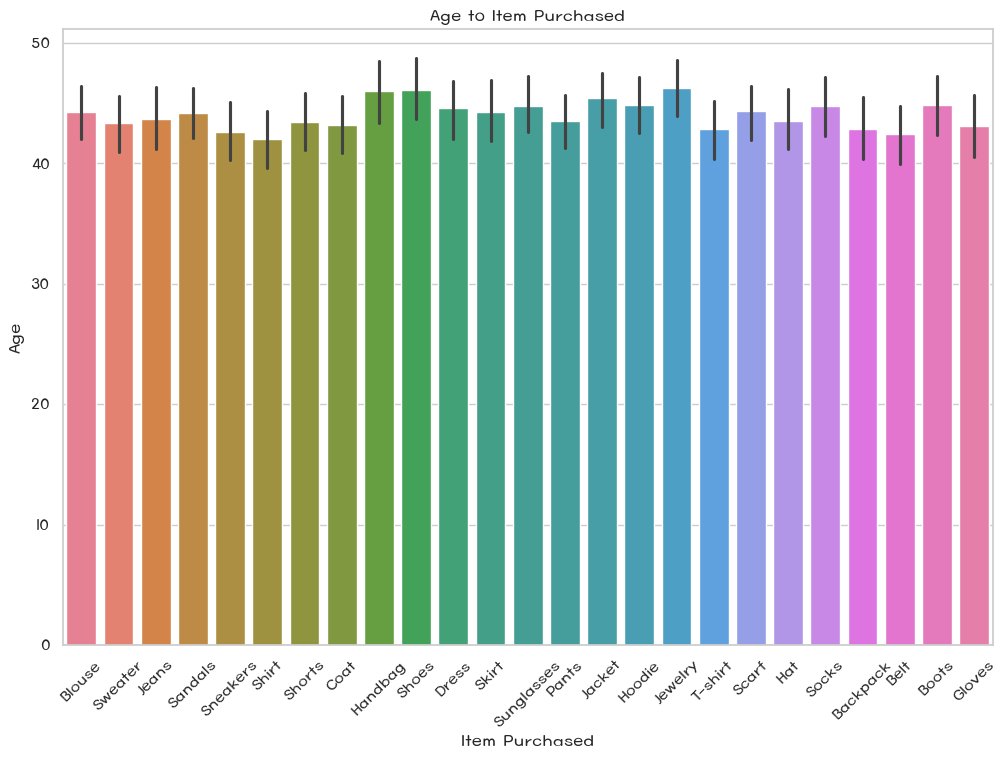

In [59]:
# 나이별 상품품목
fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.barplot(data=shopping_df, x='Item Purchased', y='Age', hue='Item Purchased')
plt.xticks(rotation=45)
plt.title('Age to Item Purchased')
plt.show()

## 서부 - 카테고리별 연령대 구매율

In [60]:
# 지역으로 분류
def location_separate(location):
    
    EAST_STATES = ('Alabama', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Vermont', 'Virginia', 'West Virginia')
    CENTRAL_STATES = ('Arkansas', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Louisiana', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'Oklahoma', 'South Dakota', 'Texas', 'Wisconsin')
        
    if location in EAST_STATES :
            return '동부'
    elif location in CENTRAL_STATES :
            return '중부'
    else:
            return '서부'    

    # 동부 (East)   Alabama, Connecticut, Delaware, Florida, Georgia, Kentucky, Maine, Maryland, Massachusetts, Mississippi, New Hampshire, New Jersey, New York, North Carolina, Pennsylvania, Rhode Island, South Carolina, Tennessee, Vermont, Virginia, West Virginia
    # 중부 (Central)   Arkansas, Illinois, Indiana, Iowa, Kansas, Louisiana, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, Oklahoma, South Dakota, Texas, Wisconsin
    # 서부 (West)   Alaska, Arizona, California, Colorado, Hawaii, Idaho, Montana, Nevada, New Mexico, Oregon, Utah, Washington, Wyoming

location_category = shopping_df['Location'].apply(location_separate)
shopping_df['Region'] = location_category
display(shopping_df)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Region
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,동부
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,동부
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,동부
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,동부
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,서부
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,동부
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,중부
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,동부
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,중부


['Clothing' 'Footwear' 'Outerwear' 'Accessories']


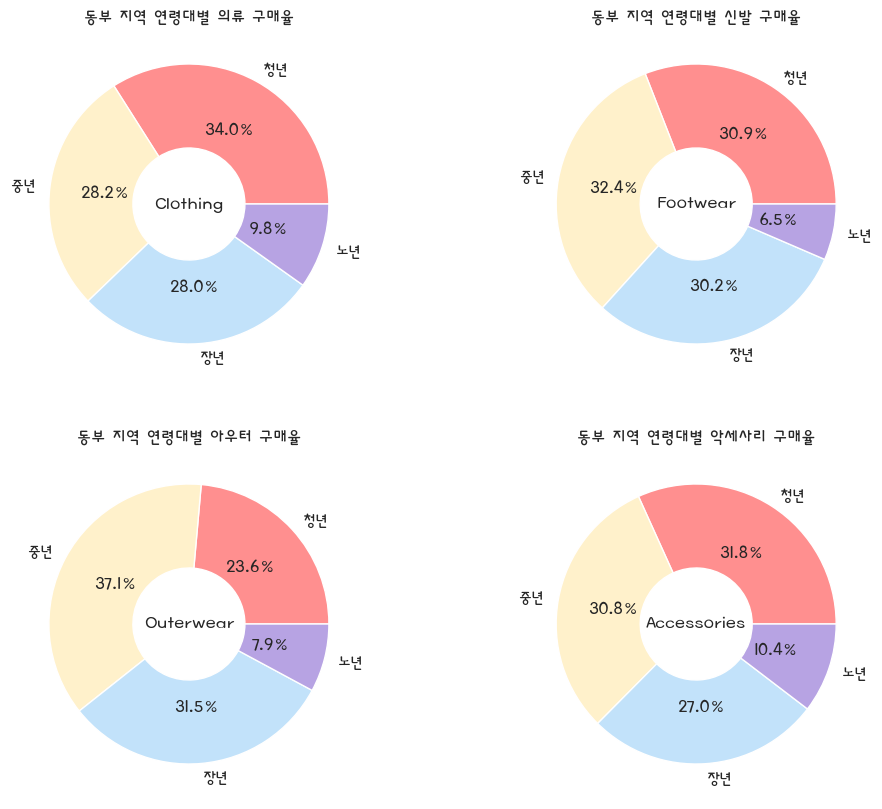

In [61]:
print(shopping_df['Category'].unique())

shopping_df['AgeGroup'] = pd.cut(shopping_df['Age'], 
                                 bins=[19, 35, 50, 64, shopping_df['Age'].max()],
                                 labels=['청년', '중년', '장년', '노년'],
                                 right=False)

# 서부 지역만 필터링
west = shopping_df[shopping_df['Region'] == '서부']

# 카테고리별
clothing_df = west[west['Category'] == 'Clothing']
footwear_df = west[west['Category'] == 'Footwear']
outwear_df = west[west['Category'] == 'Outerwear']
accessories_df = west[west['Category'] == 'Accessories']

# 연령대별 
clothing_df_age = clothing_df['AgeGroup'].value_counts().sort_index()
footwear_df_age = footwear_df['AgeGroup'].value_counts().sort_index()
outwear_df_age = outwear_df['AgeGroup'].value_counts().sort_index()
accessories_df_age = accessories_df['AgeGroup'].value_counts().sort_index()


fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0,0].pie(clothing_df_age, labels=clothing_df_age.index, autopct='%1.1f%%', 
            wedgeprops={'width' : 0.6},
            colors=['#FF8F8F', '#FFF1CB', '#C2E2FA', '#B7A3E3'])
ax[0,0].set_title('동부 지역 연령대별 의류 구매율')
ax[0,0].text(0, 0, 'Clothing', ha='center', va='center')

ax[0,1].pie(footwear_df_age, labels=footwear_df_age.index, autopct='%1.1f%%',
            wedgeprops={'width' : 0.6},
            colors=['#FF8F8F', '#FFF1CB', '#C2E2FA', '#B7A3E3'])
ax[0,1].set_title('동부 지역 연령대별 신발 구매율')
ax[0,1].text(0, 0, 'Footwear', ha='center', va='center')

ax[1,0].pie(outwear_df_age, labels=outwear_df_age.index, autopct='%1.1f%%',
            wedgeprops={'width' : 0.6},
            colors=['#FF8F8F', '#FFF1CB', '#C2E2FA', '#B7A3E3'])
ax[1,0].set_title('동부 지역 연령대별 아우터 구매율')
ax[1,0].text(0, 0, 'Outerwear', ha='center', va='center')


ax[1,1].pie(accessories_df_age, labels=accessories_df_age.index, autopct='%1.1f%%',
            wedgeprops={'width' : 0.6},
            colors=['#FF8F8F', '#FFF1CB', '#C2E2FA', '#B7A3E3'])
ax[1,1].set_title('동부 지역 연령대별 악세사리 구매율')
ax[1,1].text(0, 0, 'Accessories', ha='center', va='center')

plt.show()

## 서부 - 카테고리별 구매율

Category
Clothing       463
Accessories    323
Footwear       143
Outerwear       89
Name: count, dtype: int64


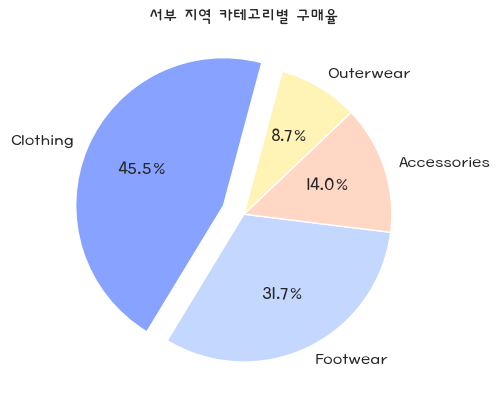

In [62]:
print(west['Category'].value_counts())

category_count = west['Category'].value_counts()

plt.pie(category_count, labels=west['Category'].unique(), 
        autopct='%1.1f%%', explode=[0.15, 0, 0, 0], startangle=75,
        colors=['#87A2FF', '#C4D7FF', '#FFD7C4', '#FFF4B5'])

plt.title('서부 지역 카테고리별 구매율')
plt.show()

## 서부 - 카테고리별 남/여 구매수

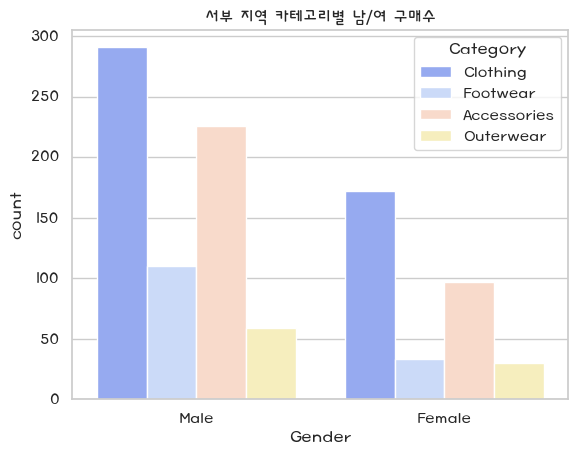

In [63]:
category_colors = ['#87A2FF', '#C4D7FF', '#FFD7C4', '#FFF4B5']

sns.countplot(data=west, x='Gender', hue='Category', palette=category_colors)
plt.title('서부 지역 카테고리별 남/여 구매수')
plt.show()


## 서부 - 계절별 많이 구매한 상품품목

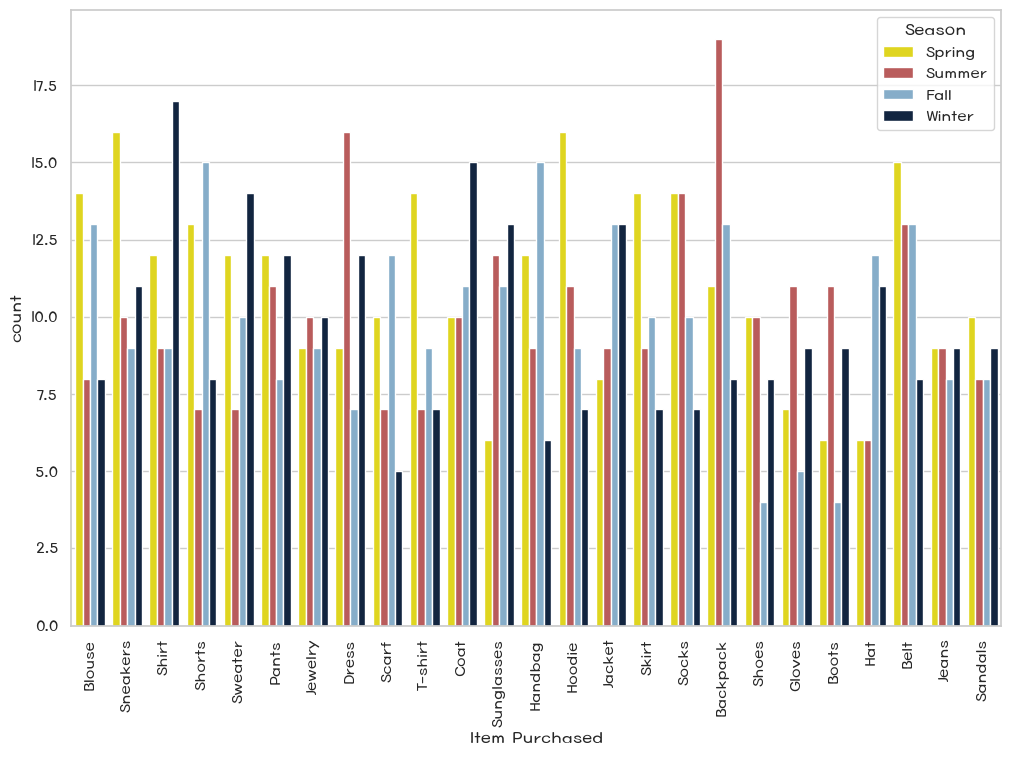

In [64]:
fig = plt.subplots(figsize=(12,8))
sns.countplot(data=west, x='Item Purchased', hue='Season', 
              palette=['#FFF200',
    '#C94C4C',
    '#7BAFD4',
    '#0B2447'
])
plt.xticks(rotation=90)
plt.show()

['Winter' 'Spring' 'Summer' 'Fall']


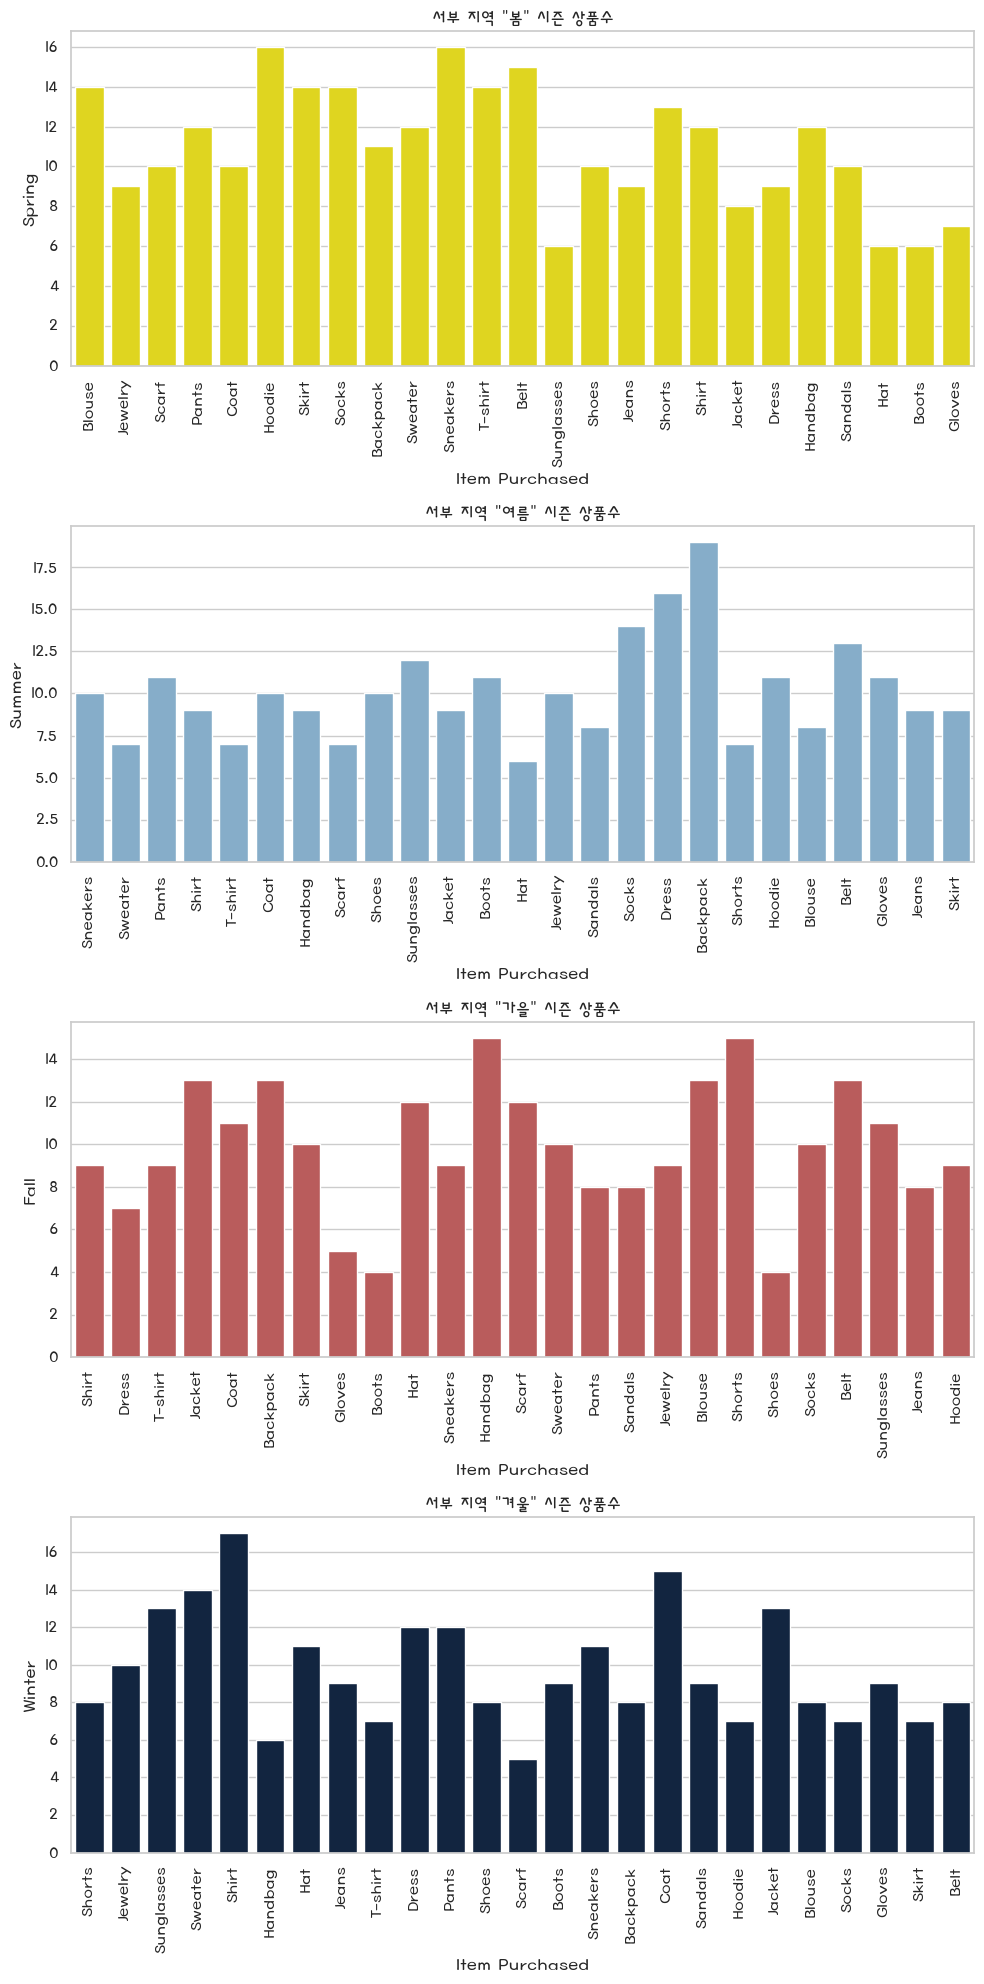

In [65]:
print(shopping_df['Season'].unique())

east_spring = west[west['Season'] == 'Spring']
east_summer = west[west['Season'] == 'Summer']
east_fall = west[west['Season'] == 'Fall']
east_winter = west[west['Season'] == 'Winter']

fig, ax = plt.subplots(4, 1, figsize=(10,20))

# 봄
sns.countplot(data=east_spring, x='Item Purchased', color='#FFF200', ax=ax[0])
ax[0].set_ylabel('Spring')
ax[0].set_title('서부 지역 "봄" 시즌 상품수')
ax[0].tick_params(axis='x', rotation=90)

# 여름
sns.countplot(data=east_summer, x='Item Purchased', color='#7BAFD4', ax=ax[1])
ax[1].set_ylabel('Summer')
ax[1].set_title('서부 지역 "여름" 시즌 상품수')
ax[1].tick_params(axis='x', rotation=90)

# 가을
sns.countplot(data=east_fall, x='Item Purchased', color= '#C94C4C', ax=ax[2])
ax[2].set_ylabel('Fall')
ax[2].set_title('서부 지역 "가을" 시즌 상품수')
ax[2].tick_params(axis='x', rotation=90)

# 겨울
sns.countplot(data=east_winter, x='Item Purchased', ax=ax[3], color='#0B2447')
ax[3].set_ylabel('Winter')
ax[3].set_title('서부 지역 "겨울" 시즌 상품수')
ax[3].tick_params(axis='x', rotation=90)

# ax 간격 자동조절
plt.tight_layout()
plt.show()

## 

Color,Beige,Black,Blue,Brown,Charcoal,Cyan,Gold,Gray,Green,Indigo,...,Peach,Pink,Purple,Red,Silver,Teal,Turquoise,Violet,White,Yellow
Review Rating,,,,,,,,,,,,,,,,,,,,,
2.5점,25.461538,27.071429,22.529412,22.347826,26.500000,25.375000,27.928571,25.766667,25.033333,23.840000,...,28.735294,21.095238,25.761905,28.444444,27.000000,21.416667,23.461538,21.777778,29.000000,23.071429
3점,24.288889,27.107143,26.057143,30.533333,19.280000,26.378378,22.322581,27.909091,25.409091,24.162162,...,27.642857,24.758621,22.413793,26.545455,26.400000,25.931818,27.192308,21.659091,24.906250,23.370370
3.5점,26.406250,29.000000,21.269231,22.172414,24.120000,29.361111,24.724138,24.347826,23.433333,26.666667,...,25.476190,29.914286,23.322581,24.153846,27.000000,28.617647,28.285714,30.263158,25.705882,19.628571
4점,23.055556,22.256410,22.214286,29.620690,29.050000,25.400000,21.625000,31.833333,24.500000,25.000000,...,27.733333,22.297297,26.888889,26.121212,24.425000,24.282051,24.259259,25.466667,28.954545,27.322581
4.5점,24.807692,27.459459,25.857143,25.357143,21.133333,30.120000,25.166667,29.659574,25.120000,23.461538,...,25.545455,23.461538,25.884615,23.846154,27.870968,27.838710,26.300000,20.600000,31.333333,21.900000


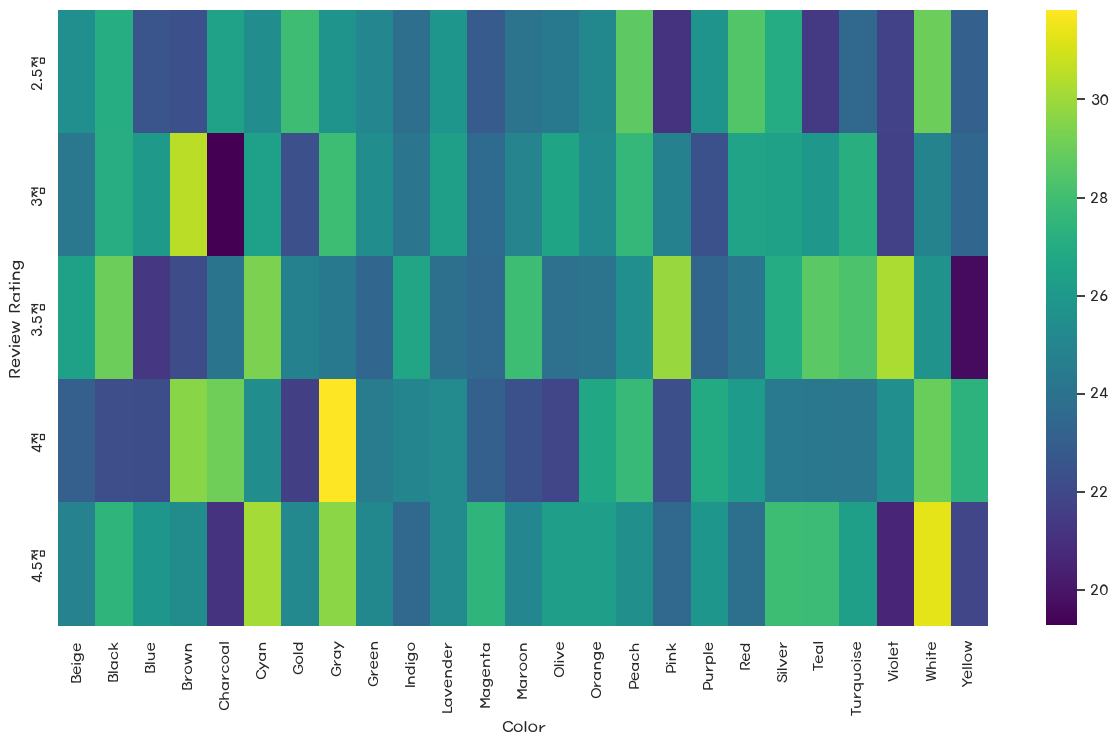

In [66]:
# 색상과 리뷰의 구매금액 교차분석
review_index = pd.cut(shopping_df['Review Rating'],
                      bins=[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
                      labels=['1점', '1.5점', '2점', '2.5점', '3점', '3.5점', '4점', '4.5점'],
                      right=False)

pivot_review_fre = shopping_df.pivot_table(index=review_index, columns='Color',
                                           values='Previous Purchases', observed=True)

display(pivot_review_fre)

# 히트맵으로 비교
fig = plt.subplots(figsize=(15,8))
sns.heatmap(pivot_review_fre, annot=False, cmap='viridis')
plt.show()

Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Review Rating,,,,,,,
2.5점,58.782609,67.821429,66.031250,62.045455,55.700000,60.736842,58.280000
3점,57.586207,67.593750,62.464286,60.733333,57.969697,63.117647,62.695652
3.5점,55.785714,59.250000,64.147059,64.138889,57.315789,58.846154,59.428571
4점,67.837209,63.750000,62.255814,54.227273,62.851852,62.666667,55.393939
4.5점,56.035714,56.920000,54.615385,56.468750,67.320000,62.633333,62.833333


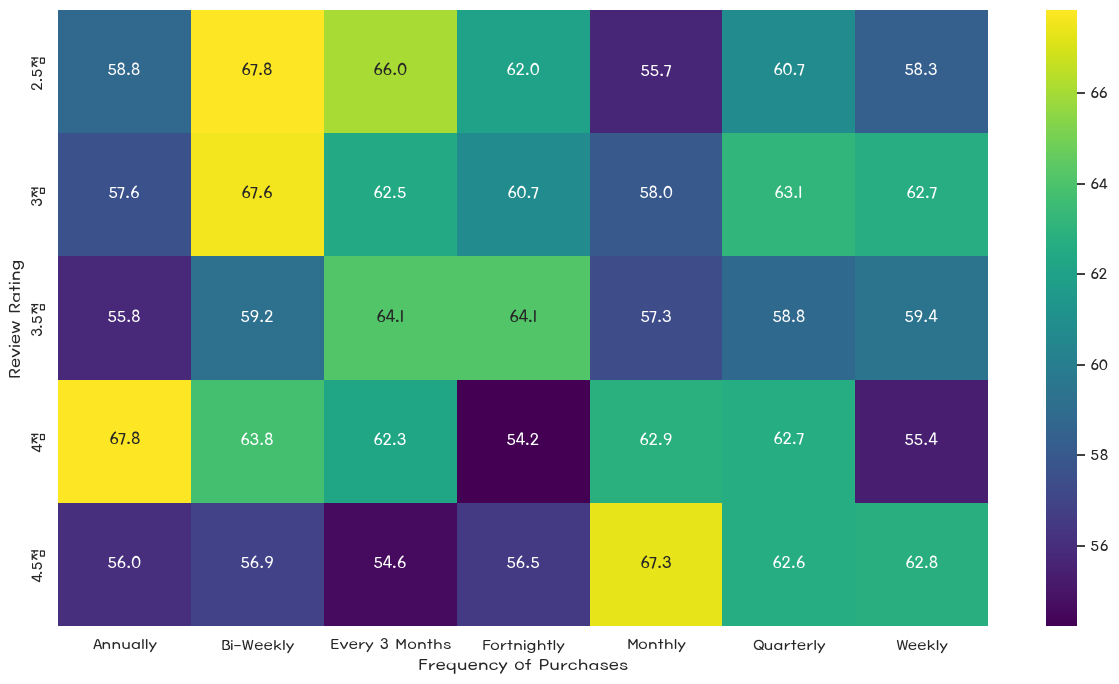

In [68]:
# 빈도수와 할인의 평균 구매금액 교차분석
review_index = pd.cut(west['Review Rating'],
                      bins=[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
                      labels=['1점', '1.5점', '2점', '2.5점', '3점', '3.5점', '4점', '4.5점'],
                      right=False)

pivot_review_fre = west.pivot_table(index=review_index, columns='Frequency of Purchases',
                                           values='Purchase Amount (USD)', observed=True)

display(pivot_review_fre)

# 히트맵으로 비교
fig = plt.subplots(figsize=(15,8))
sns.heatmap(pivot_review_fre, annot=True, cmap='viridis', fmt='.1f')
plt.show()

In [75]:
# 수치형 컬럼만 선택
numeric_df = shopping_df.select_dtypes(include=['number'])

# 범주형 컬럼만 선택
categorical_df = shopping_df.select_dtypes(include=['object', 'category'])

# 확인
display(numeric_df.describe())
display(categorical_df.describe())

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases,Region,AgeGroup
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3764
unique,2,25,4,50,4,25,4,2,6,2,2,6,7,3,4
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months,동부,청년
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584,1630,1172
